In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
file = pd.read_csv('fruitvegprices-2017_2022.csv')

In [3]:
file = pd.DataFrame(file)

In [4]:
file.head()

,category,item,variety,date,price,unit
0,fruit,apples,bramleys_seedling,2022-03-11,2.05,kg
1,fruit,apples,coxs_orange_group,2022-03-11,1.22,kg
2,fruit,apples,egremont_russet,2022-03-11,1.14,kg
3,fruit,apples,braeburn,2022-03-11,1.05,kg
4,fruit,apples,gala,2022-03-11,1.03,kg


In [5]:
file.isna().sum()

category    0
item        0
variety     0
date        0
price       0
unit        0
dtype: int64

In [6]:
file.describe()

,price
count,9647.000000
mean,1.528333
std,1.927865
min,0.020000
25%,0.540000
50%,0.880000
75%,1.500000
max,17.600000


In [7]:
file.item.unique()

array(['apples', 'pears', 'beetroot', 'brussels_sprouts', 'pak_choi',
       'curly_kale', 'cabbage', 'spring_greens', 'carrots', 'cauliflower',
       'celeriac', 'cucumbers', 'leeks', 'lettuce', 'onion', 'swede',
       'turnip', 'parsnips', 'rhubarb', 'tulips', 'capsicum',
       'chinese_leaf', 'celery', 'tomatoes', 'coriander', 'spinach_leaf',
       'raspberries', 'calabrese', 'strawberries', 'blackberries',
       'rocket', 'mixed_babyleaf_salad', 'gladioli', 'sweetcorn',
       'currants', 'blueberries', 'beans', 'courgettes', 'plums', 'peas',
       'cherries', 'gooseberries', 'asparagus', 'watercress',
       'alstromeria', 'lillies', 'narcissus', 'cyclamen', 'poinsettia',
       'chrysanthemum', 'geranium', 'stocks', 'sweet_williams', 'peony'],
      dtype=object)

In [8]:
file.dtypes

category     object
item         object
variety      object
date         object
price       float64
unit         object
dtype: object

In [9]:
file.date = pd.to_datetime(file.date)

In [10]:
file.dtypes

category            object
item                object
variety             object
date        datetime64[ns]
price              float64
unit                object
dtype: object

In [11]:
file.unit.unique()

array(['kg', 'head', 'twin', 'stem', 'unit'], dtype=object)

In [12]:
file.category.unique()

array(['fruit', 'vegetable', 'cut_flowers', 'pot_plants'], dtype=object)

In [13]:
file.variety.unique()

array(['bramleys_seedling', 'coxs_orange_group', 'egremont_russet',
       'braeburn', 'gala', 'other_late_season', 'conference',
       'doyenne_du_comice', 'beetroot', 'brussels_sprouts', 'pak_choi',
       'curly_kale', 'red', 'savoy', 'prepacked', 'white',
       'round_green_other', 'topped_washed', 'all', 'celeriac',
       'cucumbers', 'trimmed', 'butterhead_indoor', 'little_gem',
       'bulb_brown', 'bulb_red', 'swede', 'turnip', 'all_varieties',
       'forced', 'outdoor', 'tulips', 'chinese_leaf', 'other_mid_season',
       'summer_autumn_pointed', 'all_washed', 'vine', 'other',
       'coriander', 'loose_bunches', 'raspberries', 'calabrese', 'green',
       'other_early_season', 'strawberries', 'elongated', 'cos', 'round',
       'cherry', 'blackberries', 'crisp_iceberg_type', 'rocket',
       'pillow_pack', 'sweetcorn', 'blueberries', 'broad',
       'dwarf_french_or_kidney', 'runner_climbing', 'courgettes',
       'saladspring', 'all_other', 'shelling_all_varieties', 'bla

In [14]:
file.price.describe()

count    9647.000000
mean        1.528333
std         1.927865
min         0.020000
25%         0.540000
50%         0.880000
75%         1.500000
max        17.600000
Name: price, dtype: float64

/Users/dyerm/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price', ylabel='date'>

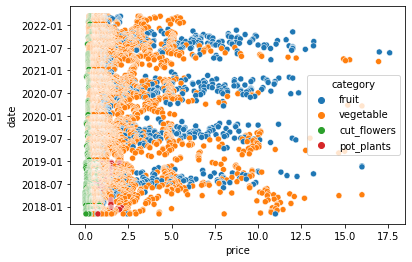

In [15]:
sns.scatterplot('price', 'date', hue='category', data=file)

<AxesSubplot:xlabel='date', ylabel='price'>

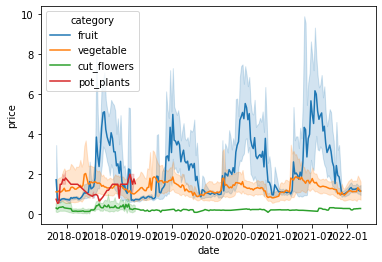

In [16]:
sns.lineplot(x='date', y='price', hue='category', data=file)

In [17]:
file['month'] = pd.DatetimeIndex(file['date']).month

In [18]:
file['year'] = pd.DatetimeIndex(file['date']).year

<AxesSubplot:xlabel='month', ylabel='price'>

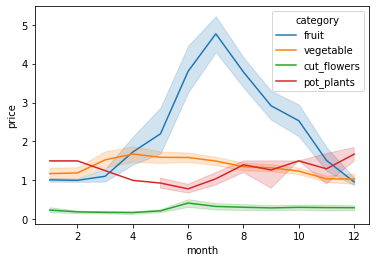

In [19]:
sns.lineplot(x='month', y='price', hue='category', data=file)

<AxesSubplot:xlabel='year', ylabel='price'>

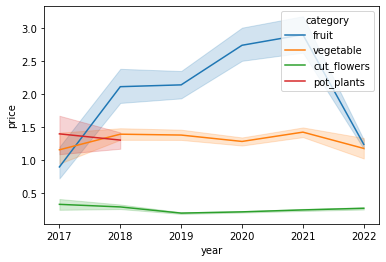

In [20]:
sns.lineplot(x='year', y='price', hue='category', data=file)

In [21]:
fruit = file[file['category']=='fruit']

In [22]:
vegetable = file[file['category']=='vegetable']

In [23]:
cut_flowers = file[file['category']=='cut_flowers']
pot_plants = file[file['category']=='pot_plants']

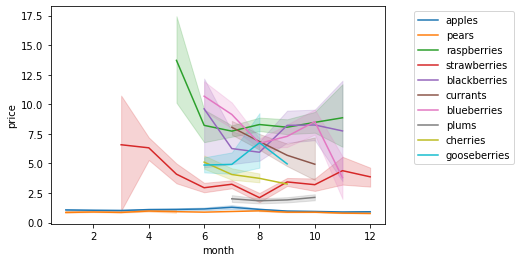

In [24]:
lp = sns.lineplot(x='month', y='price', hue='item', data=fruit)
lp.legend(loc='upper right', bbox_to_anchor=(1.4, 1))

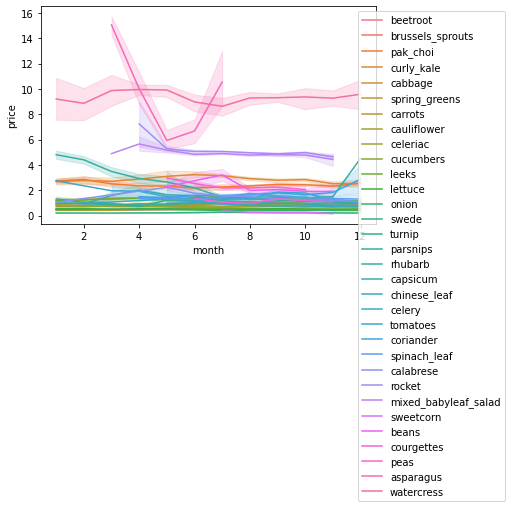

In [25]:
lp = sns.lineplot(x='month', y='price', hue='item', data=vegetable)
lp.legend(loc='upper right', bbox_to_anchor=(1.4, 1))

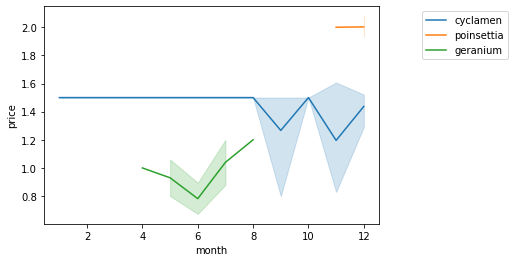

In [26]:
lp = sns.lineplot(x='month', y='price', hue='item', data=pot_plants)
lp.legend(loc='upper right', bbox_to_anchor=(1.4, 1))

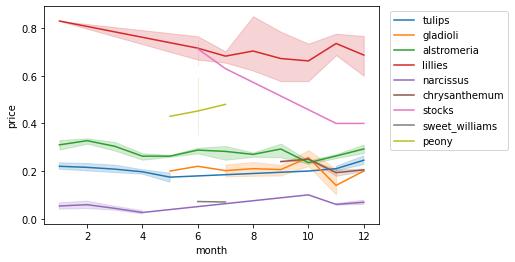

In [27]:
lp = sns.lineplot(x='month', y='price', hue='item', data=cut_flowers)
lp.legend(loc='upper right', bbox_to_anchor=(1.4, 1))

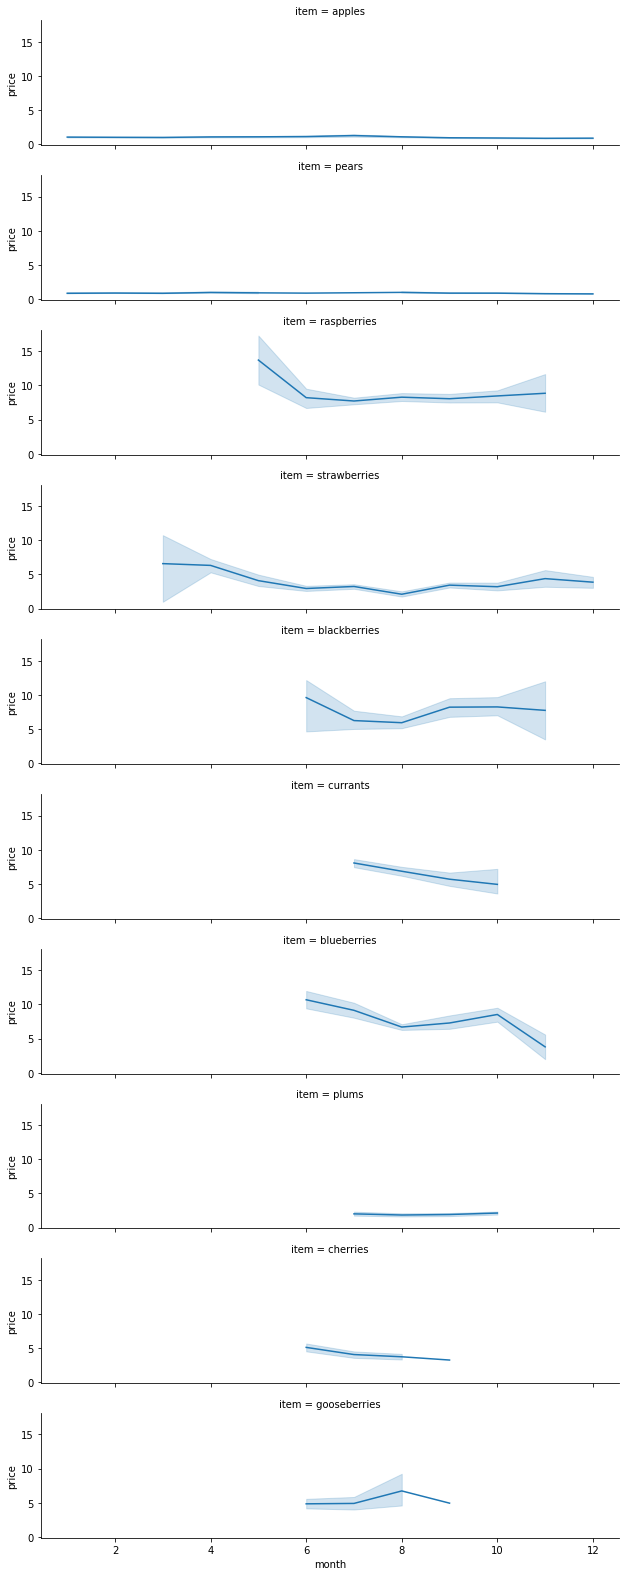

In [28]:
sns.relplot(data=fruit, x="month", y="price", 
    row="item",
    height=2.2, aspect=4,
    kind="line"
)

In [43]:
file.price = file.price.astype(str)
file.month = file.month.astype(str)
file.year = file.year.astype(str)

In [44]:
file.dtypes

category            object
item                object
variety             object
date        datetime64[ns]
price               object
unit                object
month               object
year                object
dtype: object

In [67]:
fruit.corr()

,price,month,year
price,1.000000,0.109406,0.106580
month,0.109406,1.000000,-0.228829
year,0.106580,-0.228829,1.000000


In [66]:
vegetable.corr()

,price,month,year
price,1.000000,-0.063591,0.001182
month,-0.063591,1.000000,-0.209552
year,0.001182,-0.209552,1.000000


In [63]:
cut_flowers.corr()

,price,month,year
price,1.000000,0.212726,-0.141254
month,0.212726,1.000000,-0.291502
year,-0.141254,-0.291502,1.000000


In [61]:
pot_plants.corr()

,price,month,year
price,1.000000,0.327084,-0.092946
month,0.327084,1.000000,-0.512719
year,-0.092946,-0.512719,1.000000
